<a href="https://colab.research.google.com/github/jaredms-bit/Inteligencia-Artificial/blob/main/Clasificaci%C3%B3n_de_un_candidato_a_un_empleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasificación de un candidato a un empleo

In [1]:
import numpy as np
import pandas as pd

# Voy a generar una base de datos falsa con diferentes tipos de habilidades para 5000 personas
n_muestras = 5000

# Aquí creo 6 columnas de habilidades técnicas (como Python, SQL, etc.)
# Los valores van de 70 a 100, o sea, son puntajes altos en esas habilidades
tec = np.random.randint(70, 101, (n_muestras, 6))

# Ahora creo 6 columnas de habilidades matemáticas (como probabilidad o cálculo)
# Los valores van de 60 a 90, o sea, un nivel medio-alto en matemáticas
mat = np.random.randint(60, 91, (n_muestras, 6))

# Aquí genero 6 columnas de habilidades psicológicas (como trabajo en equipo o liderazgo)
# Los valores van de 50 a 85, un poco más bajos que los anteriores
psi = np.random.randint(50, 86, (n_muestras, 6))

# Estos son los nombres de todas las columnas que tendrá la tabla
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]

# Aquí uno (junto) todas las habilidades técnicas, matemáticas y psicológicas en una sola tabla
# y creo un DataFrame (una especie de tabla de datos) con pandas llamado df
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)


Obtenemos la etiqueta


In [2]:
# Calcular promedio por grupo y promedio total
# Calculamos el promedio de todas las columnas relacionadas con habilidades tecnológicas (prom_tecnologicas) para cada fila (axis=1) del dataframe 'df'
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)

# Calculamos el promedio de todas las columnas relacionadas con habilidades matemáticas (prom_matematicas) para cada fila (axis=1) del dataframe 'df'
prom_matematicas = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)

# Calculamos el promedio de todas las columnas relacionadas con habilidades psicológicas o blandas (prom_psicologicas) para cada fila (axis=1) del dataframe 'df'
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)

# Promedio total = promedio de los 3 promedios
# Calculamos el promedio general sumando los tres promedios de grupo que acabamos de obtener y dividiéndolos entre 3
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3

# Etiqueta: 1 = apto si promedio total > 75 (el valor era 80, pero lo cambiaste a 75)
# Creamos la variable 'y' que toma el valor 1 (apto) si el promedio total es mayor a 75, y 0 (no apto) si es 75 o menos. Luego, convertimos esos True/False a 1/0 (int)
y = (prom_total > 75).astype(int)

# one-hot encoding
# Convertimos la variable 'y' (que tiene 0s y 1s) en dos columnas binarias separadas (one-hot encoding) y tomamos solo los valores (values) para usarlo en un modelo
y = pd.get_dummies(y).values

Obtenemos los conjuntos de entrenamiento

In [3]:
# Importamos la función que nos permite dividir nuestro conjunto de datos
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos completo (df, que son las características o X) y las etiquetas (y) en cuatro partes:
# 1. X_train: Las características que usaremos para entrenar el modelo (el 80% de los datos)
# 2. X_test: Las características que usaremos para probar el modelo (el 20% de los datos)
# 3. y_train: Las etiquetas correspondientes a X_train
# 4. y_test: Las etiquetas correspondientes a X_test
# test_size=0.2: Le decimos que el 20% de los datos se use para prueba.
# random_state=42: Aseguramos que la división sea siempre la misma cada vez que ejecutamos el código.
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------------------------------------------------------

# Escalamiento (o estandarización de los datos)
# Importamos la herramienta que usaremos para hacer que todas nuestras variables (características) tengan una distribución similar (media 0 y desviación estándar 1).
from sklearn.preprocessing import StandardScaler

# Creamos una "máquina" o un objeto de estandarización.
scaler = StandardScaler()

# 1. Entrenamos la "máquina" (fit) para que calcule la media y desviación estándar SOLAMENTE de nuestros datos de entrenamiento (X_train).
# 2. Luego, aplicamos esa transformación (transform) a X_train para estandarizarlo.
X_train = scaler.fit_transform(X_train)

# Aplicamos la transformación (transform) a nuestros datos de prueba (X_test) usando la misma media y desviación estándar que aprendimos de X_train.
# ¡Es importante no usar 'fit' en X_test para evitar hacer trampa o 'filtrar' información al modelo!
X_test = scaler.transform(X_test)

Red neuronal

In [4]:
# Importamos las herramientas necesarias de Keras para construir y configurar una Red Neuronal
from tensorflow.keras.models import Sequential # 'Sequential' nos permite apilar capas una tras otra (el modelo más simple)
from tensorflow.keras.layers import Dense # 'Dense' es el tipo de capa más común, donde todas las neuronas están conectadas
from tensorflow.keras.optimizers import Adam # 'Adam' es un optimizador muy popular para entrenar la red

# Creamos el modelo de red neuronal. 'Sequential' significa que vamos a poner las capas en orden, una detrás de otra.
modelo = Sequential([
    # Primera capa (Capa de entrada):
    # Tendrá 64 neuronas.
    # 'input_shape=(X_train.shape[1],)': Le decimos que la forma de entrada es igual al número de columnas (características) en nuestro conjunto de entrenamiento (X_train).
    # 'activation='relu'': Usamos la función de activación ReLU, que ayuda a la red a aprender relaciones no lineales.
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    # Segunda capa (Capa oculta):
    # Tendrá 32 neuronas. Usamos ReLU como función de activación.
    Dense(32, activation='relu'),

    # Tercera capa (Otra capa oculta):
    # Tendrá 16 neuronas. Usamos ReLU como función de activación.
    Dense(16, activation='relu'),

    # Cuarta capa (Capa de salida):
    # Tendrá 2 neuronas, que es el número de clases de salida (apto o no apto, porque usamos one-hot encoding).
    # 'activation='softmax'': Usamos Softmax para la clasificación. Convierte las salidas en probabilidades, asegurando que la suma de ambas neuronas sea 1.
    Dense(2, activation='softmax')
])

# ----------------------------------------------------------------------------------------------------

# Configuramos el optimizador
# Creamos el optimizador Adam y le establecemos una "tasa de aprendizaje" (learning_rate) pequeña de 0.001.
# Esta tasa controla qué tan grandes son los pasos que da el modelo para corregir errores durante el entrenamiento.
adam = Adam(learning_rate=0.001)

# Compilamos el modelo (lo preparamos para el entrenamiento)
# Le decimos al modelo cómo debe aprender:
# 'optimizer=adam': Usaremos el optimizador Adam que acabamos de configurar.
# 'loss='categorical_crossentropy'': Esta es la función que mide qué tan mal está el modelo prediciendo; se usa porque tenemos más de dos clases en formato one-hot encoding.
# 'metrics=['accuracy']': Le pedimos que, mientras entrena, nos muestre la 'precisión' (accuracy) para que podamos evaluar qué tan bien lo está haciendo.
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenamiento

In [5]:
# Entrenamos el modelo y guardamos el resultado del proceso en una variable llamada 'history'
# 'history' nos permitirá ver después cómo se comportó el modelo (pérdida, precisión) durante el entrenamiento.
history = modelo.fit(
    # Datos de Entrenamiento:
    X_train, y_train, # Le damos las características (X_train) y las etiquetas correctas (y_train) para que aprenda.

    # Hiperparámetros de Entrenamiento:
    # epochs=50: Le decimos que repita el proceso completo de entrenamiento (pasar por todos los datos) 50 veces. Cada repetición es una 'época'.
    epochs=50,

    # batch_size=8: Le indicamos que procese los datos en grupos pequeños de 8 muestras a la vez.
    # Después de cada grupo de 8, el modelo actualiza sus 'pesos' internos. Usar lotes pequeños ayuda a que el aprendizaje sea más fino.
    batch_size=8,

    # Evaluación durante el entrenamiento:
    # validation_data=(X_test, y_test): Le pedimos que, al final de cada 'época', evalúe qué tan bien le va con los datos de prueba (X_test y y_test),
    # que son datos que no ha usado para aprender. Esto nos ayuda a detectar si el modelo está sufriendo 'sobreajuste' (overfitting).
    validation_data=(X_test, y_test),

    # Visualización:
    # verbose=1: Le decimos que queremos ver el progreso del entrenamiento en la pantalla (una línea por cada época).
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8237 - loss: 0.3930 - val_accuracy: 0.9650 - val_loss: 0.0850
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.0851 - val_accuracy: 0.9750 - val_loss: 0.0560
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0498 - val_accuracy: 0.9770 - val_loss: 0.0500
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0411 - val_accuracy: 0.9740 - val_loss: 0.0487
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9790 - val_loss: 0.0498
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0277 - val_accuracy: 0.9770 - val_loss: 0.0643
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.9810 - val_loss: 0.0555
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.

Matriz de confusión

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


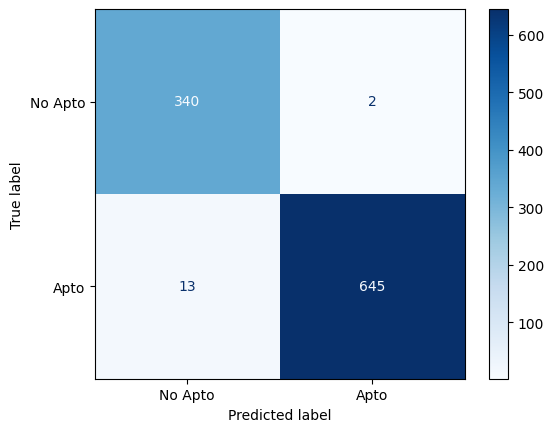


Sensitivity (Recall) por clase:
No Apto: 0.99
Apto: 0.98


In [6]:
# Importamos las herramientas que nos permiten evaluar el rendimiento de nuestro modelo de clasificación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
import numpy as np # Necesitamos NumPy para trabajar con arreglos de manera eficiente
import matplotlib.pyplot as plt # Necesitamos Matplotlib para poder mostrar la gráfica de la Matriz de Confusión

# ----------------------------------------------------------------------------------------------------

# Hacemos las Predicciones
# Usamos el modelo entrenado para predecir las etiquetas de los datos de prueba (X_test). El resultado es una probabilidad por clase.
pred = modelo.predict(X_test)

# Convertimos las predicciones a etiquetas simples
# 'pred' nos da una probabilidad para la clase 0 y una para la clase 1. Aquí, tomamos la clase con la probabilidad más alta (el índice, axis=1),
# y ese índice se convierte en nuestra etiqueta predicha (0 o 1).
y_pred = np.argmax(pred, axis=1)

# Hacemos lo mismo con las etiquetas verdaderas
# Como nuestras etiquetas originales (y_test) estaban en formato one-hot encoding (dos columnas), las convertimos de nuevo a etiquetas simples (0 o 1)
# para que puedan ser comparadas directamente con nuestras predicciones (y_pred).
y_true = np.argmax(y_test, axis=1)

# ----------------------------------------------------------------------------------------------------

# Matriz de Confusión
# Calculamos la matriz de confusión (cm). Esta tabla nos muestra cuántas predicciones fueron correctas (en la diagonal) y cuántas fueron incorrectas (fuera de la diagonal).
cm = confusion_matrix(y_true, y_pred)

# Preparamos el gráfico de la matriz de confusión
# Creamos un objeto para mostrar la matriz. Le pasamos la matriz 'cm' que calculamos y le damos los nombres que deben tener las etiquetas ('No Apto', 'Apto').
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])

# Dibujamos y mostramos el gráfico de la matriz de confusión, usando un esquema de color azul.
disp.plot(cmap='Blues')
plt.show() # Mostramos la gráfica en pantalla
#

# ----------------------------------------------------------------------------------------------------

# Sensibilidad (Recall)
# Calculamos la métrica 'sensibilidad' (o recall) para cada clase (average=None).
# La sensibilidad mide qué tan bien el modelo encuentra todos los casos positivos (verdaderos) de cada clase.
sensitivity = recall_score(y_true, y_pred, average=None)

# Imprimimos los resultados
print("\nSensitivity (Recall) por clase:")
# Imprimimos la sensibilidad para la clase 0 ('No Apto'), con dos decimales.
print(f"No Apto: {sensitivity[0]:.2f}")
# Imprimimos la sensibilidad para la clase 1 ('Apto'), con dos decimales.
print(f"Apto: {sensitivity[1]:.2f}")

Evaluar un nuevo candidato

In [7]:
# ----------------------------------------------------------------------------------------------------
# 1. Preparación del Nuevo Candidato
# Creamos un arreglo de NumPy (nuevo_candidato) con las 18 puntuaciones del individuo, respetando el orden de las columnas originales del DataFrame 'df'.
# El orden es: 6 técnicas, 6 matemáticas, y 6 psicológicas.
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,    # Puntuaciones en habilidades técnicas
                             82, 86, 85, 83, 87, 80,    # Puntuaciones en habilidades matemáticas
                             70, 75, 80, 72, 78, 74]])  # Puntuaciones en habilidades psicológicas

# ----------------------------------------------------------------------------------------------------
# 2. Escalamiento del Candidato
# Aplicamos la misma estandarización (scaler.transform) que hicimos a los datos de entrenamiento (X_train).
# ¡Es crucial usar el mismo 'scaler' para que los datos del nuevo candidato estén en la misma escala que los datos que el modelo aprendió!
nuevo_candidato_scaled = scaler.transform(nuevo_candidato)

# ----------------------------------------------------------------------------------------------------
# 3. Predicción del Modelo
# Usamos el modelo entrenado (modelo.predict) para obtener las probabilidades de que el candidato pertenezca a cada clase,
# usando los datos ya escalados. El resultado será un arreglo con dos valores (probabilidad de 0, probabilidad de 1).
pred_nuevo = modelo.predict(nuevo_candidato_scaled)

# ----------------------------------------------------------------------------------------------------
# 4. Decisión de la Clase
# np.argmax(pred_nuevo): Encontramos el índice (0 o 1) que corresponde a la probabilidad más alta entre las dos salidas del modelo.
# Este índice es la clase que el modelo predice para el candidato.
clase_predicha = np.argmax(pred_nuevo)

# ----------------------------------------------------------------------------------------------------
# 5. Presentación del Resultado
# Imprimimos un mensaje claro. Usamos una expresión condicional:
# Si la 'clase_predicha' es 1, imprimimos "Apto".
# Si la 'clase_predicha' es 0, imprimimos "No Apto".
print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Evaluación de nuevo candidato:
Resultado: Apto


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
